Name:-Amanuel Lefebo
Album Number:-55185

In [7]:
import opendatasets as od
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from tensorflow import keras
from tensorflow.keras import utils
from tensorflow.keras.layers import Activation,Flatten,Dense,Dropout,BatchNormalization,MaxPooling2D,Conv2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from keras.preprocessing.image  import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
!pip install opendatasets

1. Download the Dataset and Extract the Dataset

In [3]:
od.download("https://www.kaggle.com/competitions/dogs-vs-cats-redux-kernels-edition/data")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

  amanuellefebo


Your Kaggle Key:

  ········


100%|█████████▉| 813M/814M [00:28<00:00, 26.7MB/s] 

100%|██████████| 814M/814M [00:28<00:00, 29.8MB/s]


Extracting archive .\dogs-vs-cats-redux-kernels-edition/dogs-vs-cats-redux-kernels-edition.zip to .\dogs-vs-cats-redux-kernels-edition


In [9]:
import zipfile

In [12]:
dest='dogs-vs-cats-redux-kernels-edition/test/'
with zipfile.ZipFile('dogs-vs-cats-redux-kernels-edition/test.zip', 'r') as zip_ref:
    zip_ref.extractall(dest)

In [13]:
dest='dogs-vs-cats-redux-kernels-edition/train_2/'
with zipfile.ZipFile('dogs-vs-cats-redux-kernels-edition/train.zip', 'r') as zip_ref:
    zip_ref.extractall(dest)

In [ ]:
import os
image_dir = 'dogs-vs-cats-redux-kernels-edition/train_2/train'
input_path=[]
filenames = os.listdir(image_dir)
labels = [x.split(".")[0] for x in filenames]
for class_name in os.listdir(image_dir):
    try:
      input_path.append(os.path.join(image_dir,class_name))
    except:
                        'the path does exist'










2. Create Dataframe for further processing

In [ ]:
df=pd.DataFrame()
df['image_dir']=input_path
df['labels']=labels

In [10]:
df['image_dir'][0]

'dogs-vs-cats-redux-kernels-edition/train_2/train\\cat.0.jpg'

In [4]:
df = df.sample(frac=1).reset_index(drop=True)

In [5]:
df['labels']=df['labels'].astype('str')

In [6]:
len(df[df.labels=='cat'])

12500

In [7]:
len(df[df.labels=='dog'])

12500

In [8]:
df.head()

,image_dir,labels
0,dogs-vs-cats-redux-kernels-edition/train_2/tra...,dog
1,dogs-vs-cats-redux-kernels-edition/train_2/tra...,dog
2,dogs-vs-cats-redux-kernels-edition/train_2/tra...,dog
3,dogs-vs-cats-redux-kernels-edition/train_2/tra...,dog
4,dogs-vs-cats-redux-kernels-edition/train_2/tra...,cat


3. Visualize the first 9 elements of the Dataset

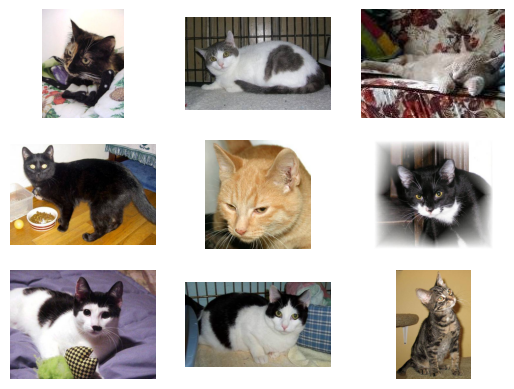

In [12]:
for i,ele in enumerate(df[df['labels']=='cat']['image_dir'][0:9]):
  img=load_img(ele)
  imG=np.array(img)
  plt.subplot(3,3,i+1)
  plt.imshow(imG)
  plt.axis('off')

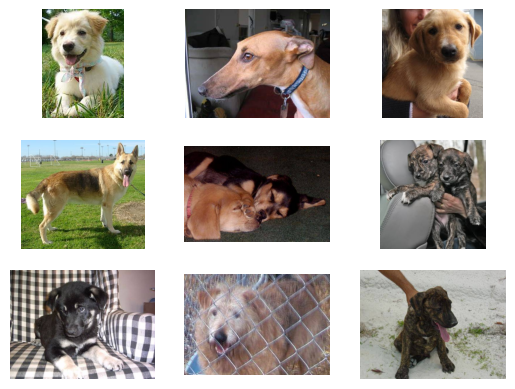

In [13]:
for i,ele in enumerate(df[df['labels']=='dog']['image_dir'][0:9]):
  img=load_img(ele)
  imG=np.array(img)
  plt.subplot(3,3,i+1)
  plt.imshow(imG)
  plt.axis('off')

4. Split the training dataset to train our model

In [10]:
train,test=train_test_split(df,test_size=0.3,random_state=101)

In [16]:
len(train[train.labels=='dog'])

8729

In [17]:
len(train[train.labels=='cat'])

8771

5.Generate the Image from the dataframe

In [140]:
train_gen= ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_gen= ImageDataGenerator(rescale=1./255)

In [176]:
train_data=train_gen.flow_from_dataframe(train,x_col='image_dir',y_col='labels',target_size=(180,180),batch_size=64,shuffle=True,class_mode='categorical')
val_data=test_gen.flow_from_dataframe(test,x_col='image_dir',y_col='labels',target_size=(180,180),batch_size=64,shuffle=True,class_mode='categorical')

Found 17500 validated image filenames belonging to 2 classes.


In [24]:
train_data.class_indices

{'cat': 0, 'dog': 1}

In [22]:
val_data.class_indices

{'cat': 0, 'dog': 1}

In [180]:
# define input shape
if tf.keras.backend.image_data_format() == 'channels_first':
    input_shape = (3, 180, 180)
else:
    input_shape = (180,180, 3)

In [150]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax')) # 2 because we have cat and dog classes



In [151]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [152]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 148, 148, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 72, 72, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 34, 34, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 34, 34, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 17, 17, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 17, 17, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 15, 15, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 15, 15, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │     1,605,888 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,738,754 (6.63 MB)

 Trainable params: 1,737,666 (6.63 MB)

 Non-trainable params: 1,088 (4.25 KB)

In [153]:
train_samples = 120
validation_samples = 30
epochs = 200
batch_size = 6

In [154]:
#In fit_generator(), you don't pass the x and y directly, instead they come from a genera
history = model.fit(
    train_data,
    steps_per_epoch=train_samples // batch_size,
    epochs=epochs,
    validation_data=val_data,
    validation_steps=validation_samples // batch_size)

Epoch 1/200


C:\Users\ritaj\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


20/20 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.5560 - loss: 1.0052 - val_accuracy: 0.5125 - val_loss: 0.7301
Epoch 2/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.6264 - loss: 0.8440 - val_accuracy: 0.5156 - val_loss: 0.8092
Epoch 3/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.5899 - loss: 0.8109 - val_accuracy: 0.4500 - val_loss: 0.9328
Epoch 4/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.6731 - loss: 0.6933 - val_accuracy: 0.4938 - val_loss: 0.8810
Epoch 5/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.6681 - loss: 0.6942 - val_accuracy: 0.4750 - val_loss: 1.0056
Epoch 6/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.6724 - loss: 0.6948 - val_accuracy: 0.5625 - val_loss: 0.7746
Epoch 7/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.6751 - loss: 0.6799 - val_accuracy: 0.5250 - val_loss: 1.0670
Epoch 8/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.7076 - loss: 0.6196 - val_accuracy: 0.4750 - val_loss: 1.5

C:\Users\ritaj\anaconda3\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 767ms/step - accuracy: 0.7128 - loss: 0.5856 - val_accuracy: 0.4781 - val_loss: 1.0742
Epoch 15/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.7273 - loss: 0.5831 - val_accuracy: 0.4750 - val_loss: 1.5033
Epoch 16/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.7263 - loss: 0.5561 - val_accuracy: 0.4875 - val_loss: 1.4165
Epoch 17/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.7300 - loss: 0.5549 - val_accuracy: 0.5125 - val_loss: 1.0776
Epoch 18/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.7200 - loss: 0.5732 - val_accuracy: 0.5000 - val_loss: 1.2739
Epoch 19/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.7344 - loss: 0.5514 - val_accuracy: 0.5406 - val_loss: 1.2214
Epoch 20/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.7043 - loss: 0.5739 - val_accuracy: 0.5656 - val_loss: 0.8617
Epoch 21/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.7488 - loss: 0.5428 - val_accuracy: 0.5938 - val

In [154]:
import matplotlib.pyplot as plt

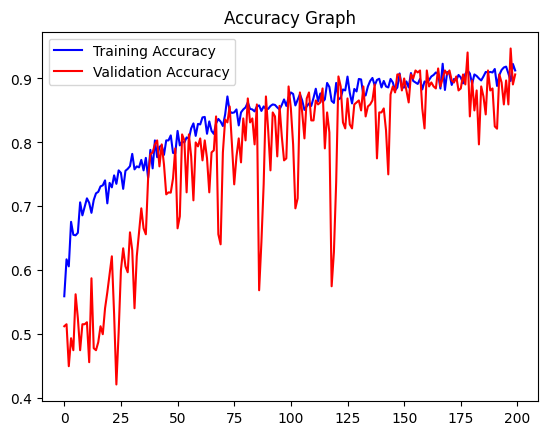

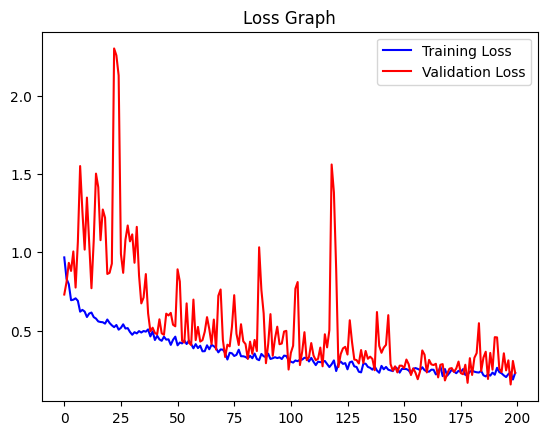

In [155]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

In [156]:
model.save('cat&dog_09_final.h5')

In [8]:
from tensorflow.keras.models import load_model

In [9]:
model1=load_model('cat&dog_09_final.h5')

In [10]:
model1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [11]:
import numpy as np

In [12]:
def pred(img_path):
    img = load_img(img_path,target_size=(150,150))
    img=np.array(img)
    img= img/255.0
    img=img.reshape(1,150,150,3)
    pred=model1.predict(img)
    pred=np.argmax(pred)
    if pred==1:
        return 'dog'
    elif pred==0:
        return 'cat'
        
    
        
    

In [13]:
def check_org(img_path):
  img=load_img(img_path)
  imG=np.array(img)
  print(imG.shape)
  plt.imshow(imG)
  plt.axis('off')
    

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
our model predict this image as  dog class
(683, 1024, 3)


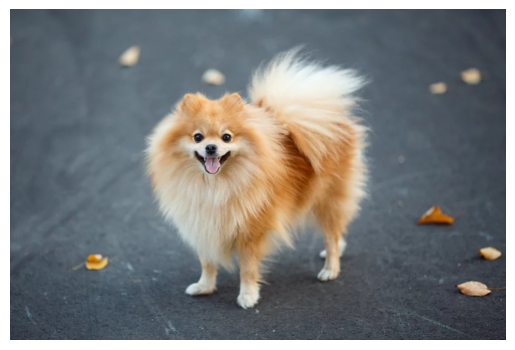

In [19]:
# predict the image
print("our model predict this image as  %s class"%pred('dog.png'))
# check the original image for model accuracy
check_org('dog.png')
plt.savefig('dog_pred.png')
